In [23]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [24]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [25]:
X_train.shape

(60000, 28, 28)

In [26]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

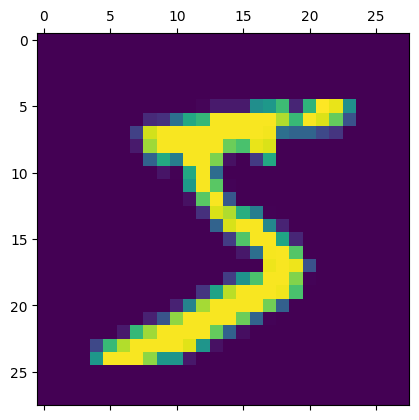

In [27]:
plt.matshow(X_train[0])

In [31]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [32]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

c:\Users\soura\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
# To remove warning
# x = keras.Input(shape=(10, 64))
# y = keras.layers.Flatten()(x)
# y.shape

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy', # This model is for seperate categories
    metrics = ['accuracy']
)

In [38]:
model.fit(X_train_scaled,
          y_train,
          batch_size = 100,
          epochs = 5)

Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9911 - loss: 0.0330
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9934 - loss: 0.0259
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9946 - loss: 0.0225
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9954 - loss: 0.0200
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9958 - loss: 0.0181


In [41]:
y_prob = model.predict(X_test_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step


In [43]:
y_pred = y_prob.argmax(axis = 1)

In [44]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    2,    1,    1,    1,    2,    0,    2,    1],
       [   0, 1123,    4,    1,    0,    1,    2,    0,    4,    0],
       [   4,    3, 1010,    5,    1,    0,    2,    2,    5,    0],
       [   0,    1,    1, 1002,    0,    0,    0,    1,    2,    3],
       [   1,    2,    7,    1,  944,    0,    3,    1,    2,   21],
       [   4,    0,    0,   19,    0,  859,    2,    0,    5,    3],
       [   6,    3,    3,    2,    1,    6,  935,    0,    2,    0],
       [   2,    6,   11,   15,    0,    0,    0,  978,    5,   11],
       [   3,    1,    5,   11,    2,    4,    2,    1,  942,    3],
       [   3,    3,    0,    8,    4,    2,    0,    0,    2,  987]])>

Text(95.72222222222221, 0.5, 'Truth')

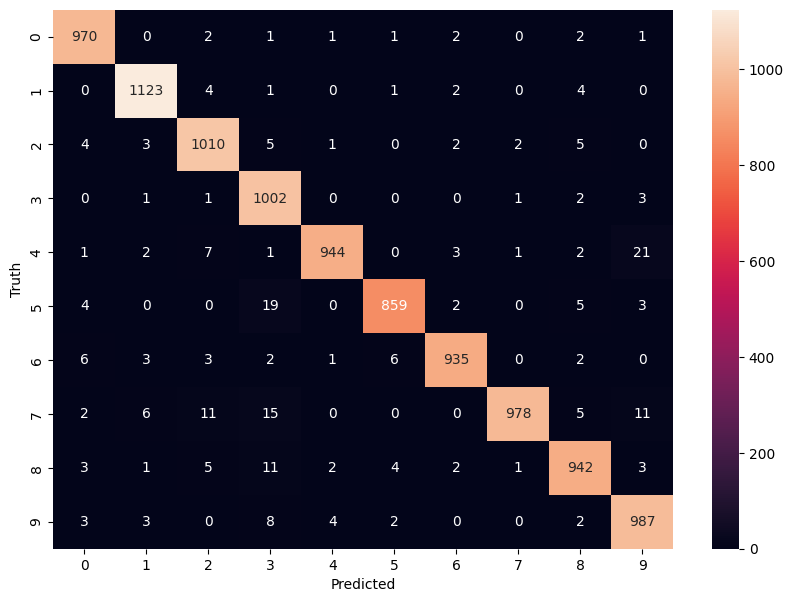

In [45]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')